<a href="https://www.kaggle.com/code/ronaldopangarego/supermarket-sales-analysis?scriptVersionId=142090932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Context**
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

## **Objectives**

   * Which branch has the most sales?
   * How much did we sell in each month? (What was the best month for sales? How much was earned that month?)
   * What product and category sold the most?
   * How much did we sell in each city?
   * Average rating (customer shopping experience)

## **Import Libraries and Dataset**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

sales = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

## **Data Exploration**



In [2]:
# The first 5 rows  of the DataFrame
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# The last 5 rows  of the DataFrame
sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [4]:
# Sales DataFrame's shape
print("Shape: %d rows and %d columns" % sales.shape)

Shape: 1000 rows and 17 columns


In [5]:
# Sales DataFrame's columns name
print("Columns: ")
for column in sales.columns:
    print("-",column)

Columns: 
- Invoice ID
- Branch
- City
- Customer type
- Gender
- Product line
- Unit price
- Quantity
- Tax 5%
- Total
- Date
- Time
- Payment
- cogs
- gross margin percentage
- gross income
- Rating


In [6]:
# Sales DataFrame's data types
print(sales.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [7]:
# Convert date and time object into datetime data type
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'])

In [8]:
# Check for missing values
print(sales.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Dataset Statistical Summary
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2023-09-06 15:24:41.880000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2023-09-06 10:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2023-09-06 12:43:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2023-09-06 15:19:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2023-09-06 18:15:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2023-09-06 20:59:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858


In [10]:
# Features Correlation
sales.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


## **Analysis & Visualizations**


#### **Which branch has the most sales?**

  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


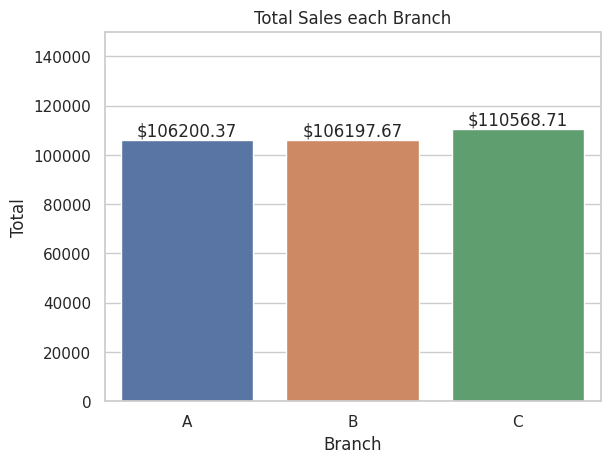

In [11]:
branch_sum = sales.groupby('Branch')['Total'].sum().reset_index()
print(branch_sum)

sns.barplot(x='Branch', y='Total', data=branch_sum)
plt.ylim(0, 150000);
plt.title("Total Sales each Branch")

# Add labels to each bar
for index, row in branch_sum.iterrows():
    plt.text(index, row['Total'], f'${row["Total"]:.2f}', ha='center', va='bottom')

#### **How much did we sell in each month?**

   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


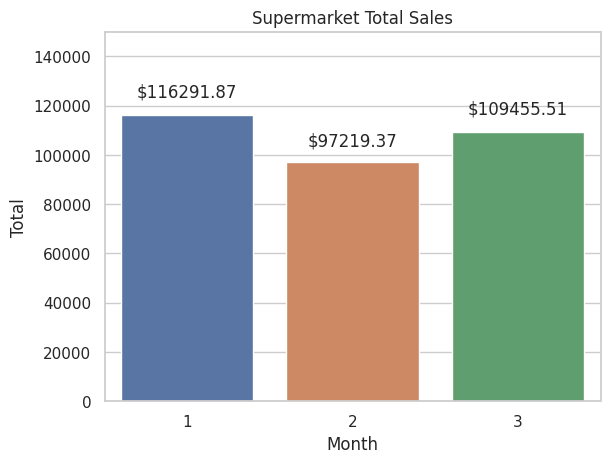

In [12]:
sales['Month'] = sales['Date'].dt.month
monthly_sales = sales.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales)

sns.barplot(x='Month', y='Total', data=monthly_sales, estimator="sum")
plt.ylim(0, 150000);
plt.title("Supermarket Total Sales")

# Add labels to data points
for index, row in monthly_sales.iterrows():
    plt.text(index, row['Total']*1.05, f'${row["Total"]:.2f}', ha='center', va='bottom')

#### **What product sold the most by quantity?**

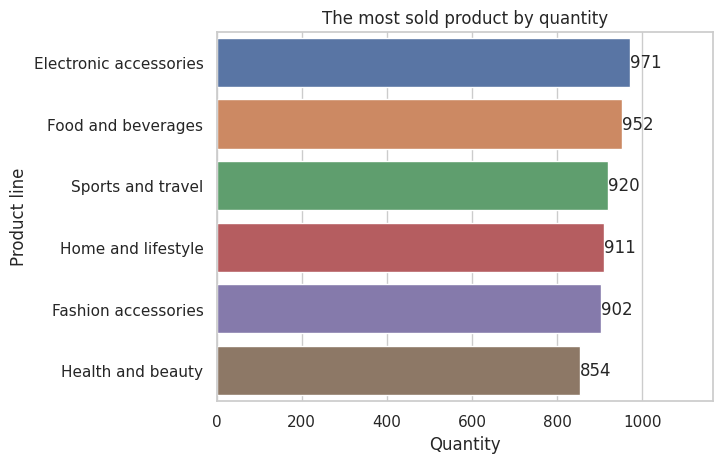

In [13]:
product = sales.groupby('Product line')['Quantity'].sum().reset_index()
product_sorted = product.sort_values(by='Quantity', ascending=False)
ax = sns.barplot(x='Quantity', y='Product line', data=product_sorted)
plt.xlim(0, product_sorted['Quantity'].max() * 1.2)
plt.title("The most sold product by quantity")
# plt.figure(figsize=(10, 6), dpi=80)
 
# Add labels to data points
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.savefig('most_sold_product.png')

#### **How much did we sell in each city?**

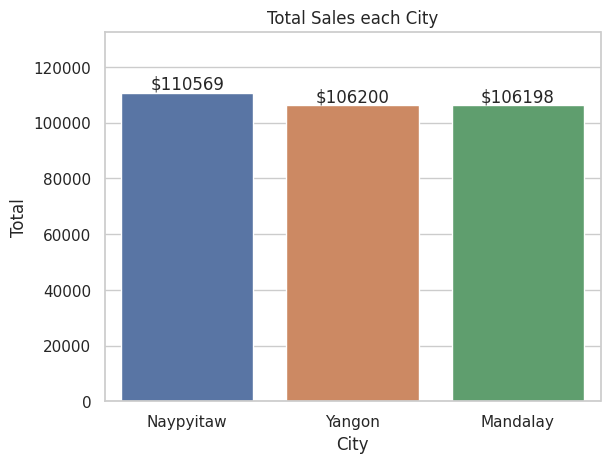

In [14]:
sales_each_city = sales.groupby('City')['Total'].sum().reset_index()
sales_each_city_sorted = sales_each_city.sort_values(by='Total', ascending=False)
# print(sales_each_city_sorted)

ax = sns.barplot(x='City', y='Total', data=sales_each_city_sorted, estimator="sum")
plt.ylim(0, sales_each_city_sorted['Total'].max()*1.2);
plt.title("Total Sales each City")

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


#### **Customer shopping experience**

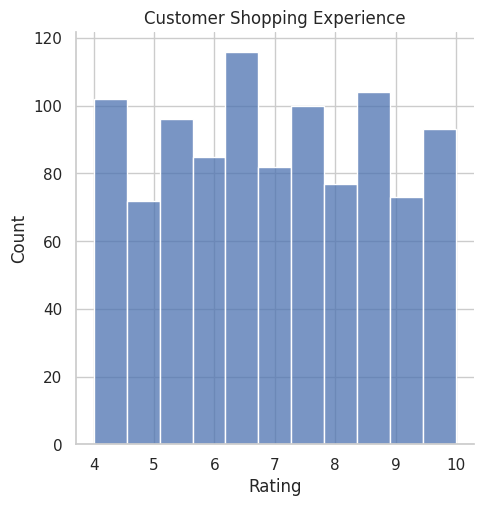

In [15]:
mean_rating = sales['Rating'].mean()
# print(f"Average rating for customer shopping experince: {mean_rating}")
sns.displot(sales['Rating'],kde=False)
plt.title('Customer Shopping Experience');


  Branch    Rating
0      A  7.027059
1      B  6.818072
2      C  7.072866


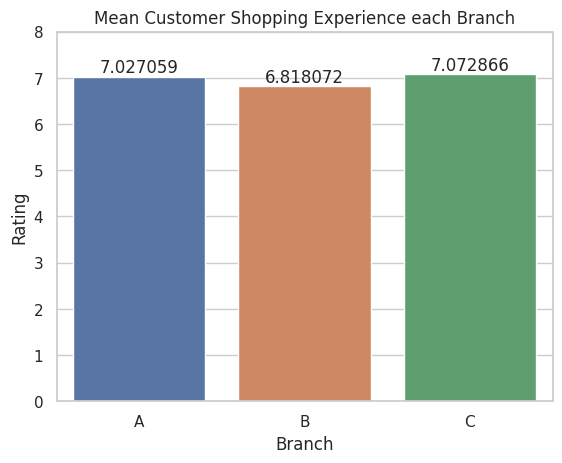

In [16]:
mean_rating_branch = sales.groupby('Branch')['Rating'].mean().reset_index()
print(mean_rating_branch)

ax = sns.barplot(x="Branch", y="Rating", data=mean_rating_branch)
plt.title('Mean Customer Shopping Experience each Branch')
plt.ylim(0,8)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
    

## **Conclusion**

   * Which branch has the most sales?
       > **Branch C** has the most sales with total `$110,568`

   * How much sales in each month?
       > January `$116291.868` \
       > February `$97219.374` \
       > March     `$109455.507`
       
   * What product sold the most?
       > *Electronic accessories* are the most sold product, closely followed by *Food and beverages*
       
   * How much did we sell in each city?
       > Naypyitaw  `$110568.706`
       > Yangon  `$106200.370`
       > Mandalay  `$106197.672`
       
   * Average rating (customer shopping experience) to each branch
        > Branch A  - 7.03/10 \
        > Branch B  - 6.82/10 \
        > Branch C  - 7.08/10 \
        > Total average customer shopping experience `6.97/10`